Nous pouvons mener les mêmes analyses par secteur 

In [3]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import statsmodels.formula.api as smf

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
chemin_fichier = '../Nettoyage des données/df_Eurostoxx_clean.csv'
df_eurostoxx_clean = pd.read_csv(chemin_fichier)
df_eurostoxx_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [5]:
chemin_fichier = '../Nettoyage des données/df_SP500_clean.csv'
df_sp500_clean = pd.read_csv(chemin_fichier)
df_sp500_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [6]:
chemin_fichier_2 = '../Collecte de données/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier_2)
df_damodaran.head()

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3


In [7]:
df_analyse = pd.concat([df_sp500_clean,df_eurostoxx_clean], ignore_index = True)
df_analyse = df_analyse.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.210,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.254,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.240,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.289,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,99.803,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748


In [8]:
df_analyse['Est_US'] = np.where(df_analyse['Zone'] == 'USA', 1, 0)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1


In [13]:
# Uniformisation des noms de pays dans les deux DataFrames

# On supprime les espaces invisibles et on remplace les doubles espaces par un seul 
df_analyse['Country'] = df_analyse['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_analyse['Country'] = df_analyse['Country'].str.replace('\s+', ' ', regex=True)
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) 

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

# Sélection des colonnes pertinentes
colonnes_marche = ['Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate']
df_damodaran = df_damodaran[colonnes_marche]

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_1379/3164129700.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_analyse['Country'] = df_analyse['Country'].str.replace('\s+', ' ', regex=True)
/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_1379/3164129700.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True)


In [14]:
# Jointure et Nettoyage des NaN 

df_fusion = pd.merge(
    df_analyse, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)
print(f"\nDataFrame après jointure et nettoyage des pays non trouvés : {len(df_fusion)} observations.")


DataFrame après jointure et nettoyage des pays non trouvés : 2707 observations.


In [15]:
df_fusion.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1,4.33,0.0,25.0
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1,4.33,0.0,25.0
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1,4.33,0.0,25.0
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1,4.33,0.0,25.0
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1,4.33,0.0,25.0


Regardons le nombre d'occurences de chaque secteur dans le data frame 

In [16]:
print(df_fusion['Sector'].value_counts())

Sector
Industrials               525
Financial Services        484
Healthcare                276
Consumer Cyclical         271
Technology                248
Consumer Defensive        204
Basic Materials           177
Utilities                 166
Real Estate               124
Energy                    120
Communication Services    112
Name: count, dtype: int64


Croisons en suite avec l'indice - Eurostoxx ou S&P500

In [19]:
tableau_repartition = pd.crosstab(df_fusion['Zone'], df_fusion['Sector'])
print(tableau_repartition)

Sector     Basic Materials  Communication Services  Consumer Cyclical  \
Zone                                                                    
Eurostoxx              112                      65                110   
USA                     65                      47                161   

Sector     Consumer Defensive  Energy  Financial Services  Healthcare  \
Zone                                                                    
Eurostoxx                  95      42                 241         109   
USA                       109      78                 243         167   

Sector     Industrials  Real Estate  Technology  Utilities  
Zone                                                        
Eurostoxx          275           43          59         55  
USA                250           81         189        111  


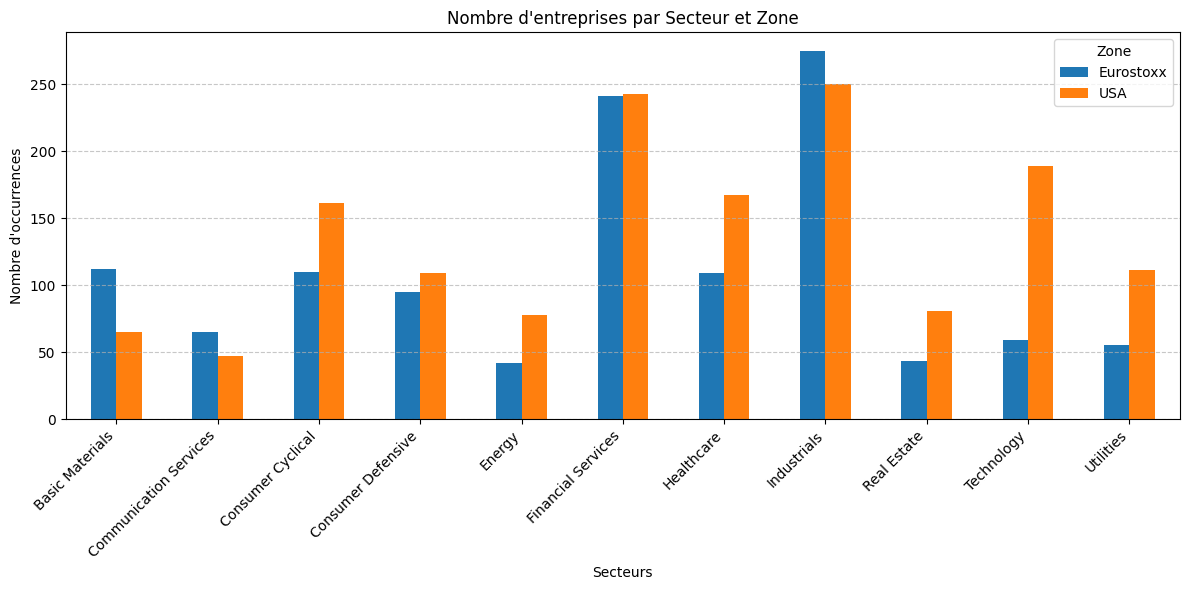

In [20]:
import matplotlib.pyplot as plt

# On transpose (.T) pour avoir les secteurs sur l'axe X
tableau_repartition.T.plot(kind='bar', figsize=(12, 6))

plt.title('Nombre d\'entreprises par Secteur et Zone')
plt.ylabel('Nombre d\'occurrences')
plt.xlabel('Secteurs')
plt.xticks(rotation=45, ha='right') # Incliner les noms pour la lisibilité
plt.legend(title='Zone')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

On remarque que les secteurs sont représentés différements entre l'Eurostoxx et le S&P500, cette différence de secteurs entre les deux dataframe peut expliquer l'écart de valorisation, il convient donc de vérifier l'impact des secteurs sur le PER. 

Calculons donc le PER moyen et médian par zone, puis par secteur et enfin par secteur et par zone. 

In [21]:
# Calcul du PER moyen et médian par zone
stats_PER_zones = df_fusion.groupby('Zone')['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_zones)

                mean     median        std  count
Zone                                             
Eurostoxx  16.851638  14.876592  10.296036   1206
USA        21.692491  20.224630  10.461659   1501


In [23]:
stats_PER_secteurs = df_fusion.groupby('Sector')['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_secteurs)

                             mean     median        std  count
Sector                                                        
Basic Materials         19.232735  16.194048  12.661276    177
Communication Services  16.354526  14.239095  10.557779    112
Consumer Cyclical       20.108634  18.530967  11.169789    271
Consumer Defensive      21.775417  20.484600   9.239552    204
Energy                  11.785255   9.749673   7.401910    120
Financial Services      13.657542  10.787552   9.202762    484
Healthcare              25.097227  23.961461  10.205732    276
Industrials             21.034314  20.011627   9.271335    525
Real Estate             22.952151  23.651138  11.176791    124
Technology              24.195053  23.482588  10.494867    248
Utilities               17.561499  17.442818   7.347621    166


In [25]:
stats_PER_secteurs_zones = df_fusion.groupby(['Sector','Zone'])['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_secteurs_zones)

                                       mean     median        std  count
Sector                 Zone                                             
Basic Materials        Eurostoxx  17.681728  15.110441  12.096869    112
                       USA        21.905240  21.245377  13.250834     65
Communication Services Eurostoxx  13.051904  12.137833   7.721671     65
                       USA        20.921982  15.073526  12.218466     47
Consumer Cyclical      Eurostoxx  19.121552  17.165120  11.776303    110
                       USA        20.783037  19.625654  10.720794    161
Consumer Defensive     Eurostoxx  21.418606  19.226168   9.715074     95
                       USA        22.086400  21.362246   8.837717    109
Energy                 Eurostoxx   9.525776   6.967895   7.190091     42
                       USA        13.001897  11.920628   7.270590     78
Financial Services     Eurostoxx  10.119090   7.894312   6.854131    241
                       USA        17.166871  13.515

On remarque que les secteurs les plus représentés dans l'Eurostoxx ont des PER plus faibles, notamment : Financial Services (241). 
Les entreprises de l'Eurostoxx ont quand même un PER inférieur en moyenne que les entreprises du S&P500. 

On peut tenter de valider l'hypothèse de l'impact du mix sectorielle sur la valorisation par une régression linéaire simple à laquelle on ajoutera les autres variables explicatives 

In [29]:
formule_test = "PER_calcule ~ C(Zone) + C(Sector)"

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     54.76
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          9.91e-110
Time:                        12:41:35   Log-Likelihood:                -9974.0
No. Observations:                2707   AIC:                         1.997e+04
Df Residuals:                    2695   BIC:                         2.004e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

On peut ajouter aux secteurs quelques données opérationnells et de marché pour tester une première regression en évitant d'augmenter les effets de multicollinéarité 

In [51]:
formule_test = """PER_calcule ~ C(Zone) + C(Sector) + Q("Equity Risk Premium") + Beta + AnneeFiscale + MarketCapitalizationBN + EPS +Q("%MargeNette") + EOD_Close_Price + NetIncomeBN
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     52.94
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          1.64e-169
Time:                        13:08:53   Log-Likelihood:                -9816.7
No. Observations:                2707   AIC:                         1.967e+04
Df Residuals:                    2687   BIC:                         1.979e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Les réferences de cette regression sont "Basic Materials" et "Eurostoxx". Tentons d'ajouter les autres variables explicatives 

formule_test = """PER_calcule ~ 
            C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") + 
            Q("Equity Risk Premium")
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

In [35]:
formule_test = """PER_calcule ~ 
            C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Q("%MargeNette") + 
            Q("%PayOut") + 
            Q("Equity Risk Premium")
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     53.67
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          1.39e-214
Time:                        12:53:38   Log-Likelihood:                -9697.8
No. Observations:                2707   AIC:                         1.945e+04
Df Residuals:                    2681   BIC:                         1.960e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [45]:
import numpy as np

# Création de la version Log pour la taille
df_fusion['log_MarketCap'] = np.log(df_fusion['MarketCapitalizationBN'])

formule_optimisee = """
PER_calcule ~ C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            log_MarketCap + 
            ROE_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") 
"""

modele_final = smf.ols(formula=formule_optimisee, data=df_fusion).fit()
print(modele_final.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     54.62
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          5.72e-218
Time:                        12:59:57   Log-Likelihood:                -9689.8
No. Observations:                2707   AIC:                         1.943e+04
Df Residuals:                    2681   BIC:                         1.959e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In